In [3]:
import json
import folium
from folium.plugins import MarkerCluster
import mapclassify as mc

filename = "../data/wymienione.json"
with open(filename, 'r') as j:
     data = json.loads(j.read())


mapObj = folium.Map(location=[51.1, 17.1], zoom_start=12)
mCluster = MarkerCluster(name="Wymienione piece").add_to(mapObj)


for item in data.values():
    try:
        number = item['S']['all']
        if number > 0:
            folium.Marker([float(item['lat']), float(item['lon'])], 
                          popup=f"Wymienione piece: {number}", tooltip=item['address']).add_to(mCluster)
    except Exception:
        pass


folium.LayerControl().add_to(mapObj)

In [4]:
mapObj

In [5]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [6]:
points = []
for item in data.values():
    try:
        points.append(Point(float(item['lon']), float(item['lat'])))    
    except Exception:
        pass




In [7]:
with open(filename) as train_file:
    dict_train = json.load(train_file)

df = pd.DataFrame.from_dict(dict_train, orient='index')
df.reset_index(level=0, inplace=True)

In [8]:
df = df[:-1]

In [9]:
len(df)

960

In [10]:
len(points)

960

In [11]:
bl_gdf = GeoDataFrame(df, geometry=points)

In [12]:
bl_gdf

,index,address,J,lat,lon,S,W,geometry
0,0,ul.Abramowskiego,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",51.1033603,17.1065189,"{'2014': 0, '2015': 1, '2016': 0, '2017': 1, '...","{'2014': 0, '2015': 1, '2016': 0, '2017': 1, '...",POINT (17.10652 51.10336)
1,1,ul.Canaletta,"{'2014': 0, '2015': 0, '2016': 0, '2017': 1, '...",51.1044875,17.1165218,"{'2014': 0, '2015': 0, '2016': 0, '2017': 1, '...","{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",POINT (17.11652 51.10449)
2,2,ul.Mielczarskiego,"{'2014': 1, '2015': 0, '2016': 0, '2017': 0, '...",51.10329567440019,17.107926184901586,"{'2014': 1, '2015': 1, '2016': 0, '2017': 0, '...","{'2014': 0, '2015': 1, '2016': 0, '2017': 0, '...",POINT (17.10793 51.10330)
3,3,ul.Norblina,"{'2014': 0, '2015': 0, '2016': 1, '2017': 0, '...",51.101926608936054,17.108947524466462,"{'2014': 0, '2015': 0, '2016': 1, '2017': 0, '...","{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",POINT (17.10895 51.10193)
4,4,ul.Plater,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",51.1071975,17.1083859,"{'2014': 0, '2015': 0, '2016': 1, '2017': 3, '...","{'2014': 0, '2015': 0, '2016': 1, '2017': 3, '...",POINT (17.10839 51.10720)
...,...,...,...,...,...,...,...,...
955,955,ul.Roździeńskiego,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",51.11873095253727,16.9272959673286,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...","{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",POINT (16.92730 51.11873)
956,956,ul.Rumiankowa,"{'2014': 0, '2015': 0, '2016': 1, '2017': 0, '...",51.12158750241794,16.924208842575453,"{'2014': 0, '2015': 0, '2016': 3, '2017': 0, '...","{'2014': 0, '2015': 0, '2016': 2, '2017': 0, '...",POINT (16.92421 51.12159)
957,957,ul.Skrzetuskiego,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",51.1165317,16.9275936,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...","{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",POINT (16.92759 51.11653)
958,958,ul.Zagłoby,"{'2014': 0, '2015': 0, '2016': 0, '2017': 0, '...",51.11870226481602,16.927766982282648,"{'2014': 0, '2015': 0, '2016': 0, '2017': 1, '...","{'2014': 0, '2015': 0, '2016': 0, '2017': 1, '...",POINT (16.92777 51.11870)


<AxesSubplot:>

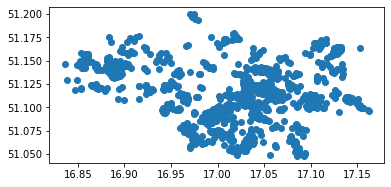

In [13]:
bl_gdf.plot()

In [14]:
gdf = gpd.read_file('../data/GraniceOsiedli/GraniceOsiedli.shp')
gdf = gdf.to_crs("EPSG:4326")

<AxesSubplot:>

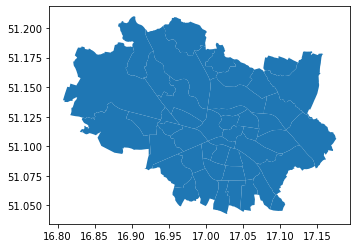

In [15]:
gdf.plot()

In [16]:
idx = 0
counts = []
for row in gdf.iterrows():
    count = 0
    for furnace in points:
        hit = row[1].geometry.contains(furnace)
        if hit == True:
            count += 1
    counts.append(count)

gdf['furnace'] = counts

In [17]:
gdf

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,furnace
0,340,21,Krzyki - Partynice,2016-01-21,5.254965e+06,9994.583078,"POLYGON ((17.00274 51.07769, 17.00307 51.07736...",30
1,341,24,Gądów - Popowice Płd.,2016-01-21,3.134569e+06,7588.647951,"POLYGON ((16.99623 51.12009, 16.99606 51.11987...",2
2,348,42,Sołtysowice,2016-01-21,4.547041e+06,9003.773230,"POLYGON ((17.07442 51.16517, 17.07537 51.16478...",7
3,349,18,Bieńkowice,2016-01-21,1.433161e+06,4760.314072,"POLYGON ((17.10486 51.04816, 17.10339 51.04529...",5
4,351,32,Żerniki,2016-01-21,3.908726e+06,9132.805421,"POLYGON ((16.93916 51.12235, 16.93915 51.12233...",16
5,352,29,Muchobór Wielki,2016-01-21,6.879545e+06,13228.130080,"POLYGON ((16.94687 51.10972, 16.94690 51.10972...",21
6,353,10,Przedmieście Oławskie,2016-01-21,5.966906e+06,12448.378083,"POLYGON ((17.04922 51.11159, 17.04926 51.11158...",26
7,354,14,Gaj,2016-01-21,2.588012e+06,6781.047181,"POLYGON ((17.03269 51.08320, 17.03550 51.08313...",6
8,355,48,Wojszyce,2016-01-21,3.270306e+06,8956.676852,"POLYGON ((17.04803 51.07111, 17.04855 51.07111...",21
9,356,15,Borek,2016-01-21,2.763975e+06,6899.239904,"POLYGON ((17.00612 51.08806, 17.00904 51.08720...",12


<AxesSubplot:>

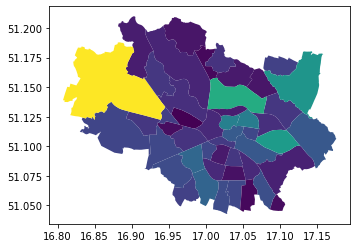

In [18]:
gdf.plot(column='furnace')

<AxesSubplot:>

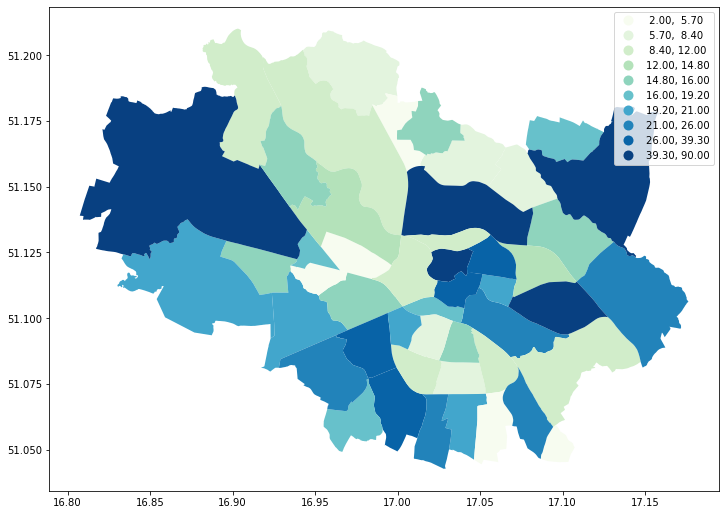

In [19]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gdf.plot(column='furnace', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax)

In [20]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [21]:
y = df['furnace']
ylag = lps.weights.lag_spatial(wq, y)
ylag

array([21.2       , 12.8       , 32.        , 16.5       , 30.8       ,
       18.16666667, 21.85714286, 16.6       , 10.66666667, 19.14285714,
       17.25      , 26.        , 15.57142857, 14.16666667, 20.5       ,
       31.2       , 21.75      , 18.66666667, 14.4       , 13.5       ,
       42.33333333, 25.4       , 23.66666667, 48.        ,  7.5       ,
       19.4       , 17.85714286, 30.2       , 25.83333333, 34.66666667,
       20.16666667, 39.        , 25.25      , 16.85714286, 27.6       ,
       17.        , 13.4       , 29.28571429, 15.5       , 16.5       ,
       15.83333333, 21.2       , 31.        , 27.83333333, 36.75      ,
       19.4       ,  7.75      ,  6.        ])

In [22]:

ylagq5 = mc.Quantiles(ylag, k=5)

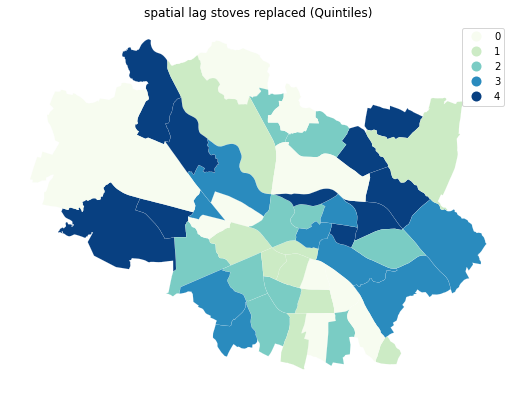

In [23]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("spatial lag stoves replaced (Quintiles)")

plt.show()

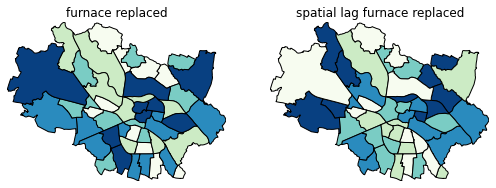

In [24]:
df['lag_furnace'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='furnace', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("furnace replaced")
df.plot(column='lag_furnace', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("spatial lag furnace replaced")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [25]:
y.median()

16.0

In [26]:
yb = y > y.median()
sum(yb)

23

In [27]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
df['yb'] = yb

<AxesSubplot:>

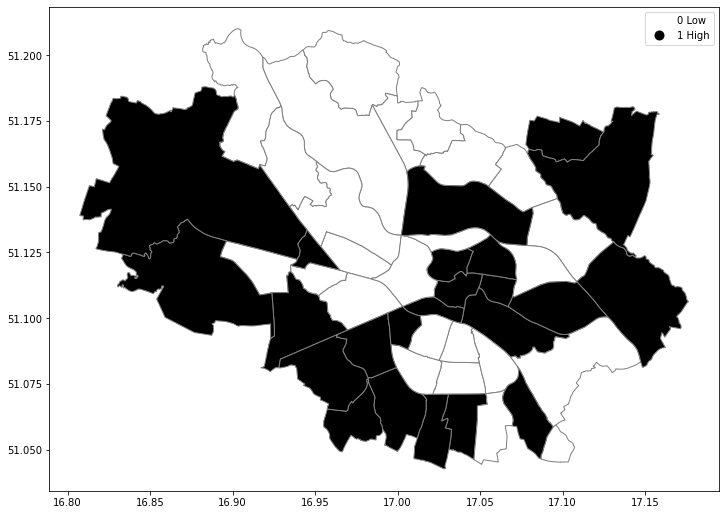

In [28]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [29]:
import esda
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [30]:
jc.bb + jc.ww + jc.bw

119.0

In [31]:
wq.s0 / 2

119.0

In [32]:
jc.bb

29.0

In [33]:
jc.mean_bb

26.73973973973974

Text(0.5, 0, 'BB Counts')

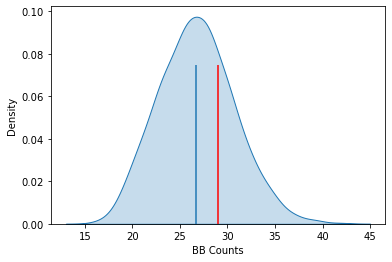

In [34]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [35]:
jc.p_sim_bb

0.316

In [36]:
wq.transform = 'r'

In [37]:
y = df['furnace']

In [38]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

-0.046760323847849

Text(0.5, 0, "Moran's I")

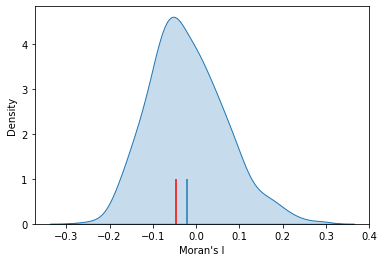

In [39]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [40]:
mi.p_sim

0.426

In [41]:
np.random.seed(12345)
import esda

In [42]:
wq.transform = 'r'
lag_furnace = lps.weights.lag_spatial(wq, df['furnace'])

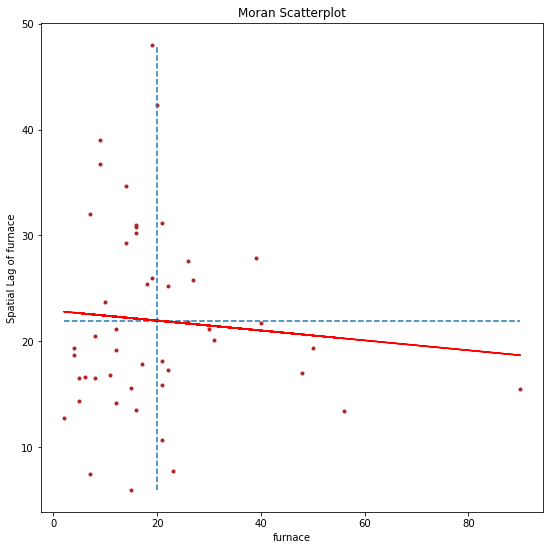

In [43]:
furnace = df['furnace']
b, a = np.polyfit(furnace, lag_furnace, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(furnace, lag_furnace, '.', color='firebrick')

 # dashed vert at mean of the furnace
plt.vlines(furnace.mean(), lag_furnace.min(), lag_furnace.max(), linestyle='--')
 # dashed horizontal at mean of lagged furnace
plt.hlines(lag_furnace.mean(), furnace.min(), furnace.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(furnace, a + b*furnace, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of furnace')
plt.xlabel('furnace')
plt.show()

In [44]:
li = esda.moran.Moran_Local(y, wq)

C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\esda\moran.py:1054: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


In [45]:
li.q

array([1, 3, 2, 3, 2, 4, 1, 3, 4, 3, 4, 2, 3, 3, 2, 1, 1, 3, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 3, 1, 4, 4, 2, 4, 3, 4, 2, 2, 1,
       2, 4, 4, 3])

In [46]:
(li.p_sim < 0.05).sum()

6

In [47]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [48]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

In [49]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

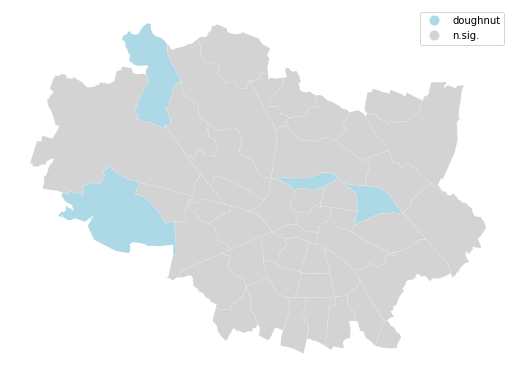

In [50]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [51]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

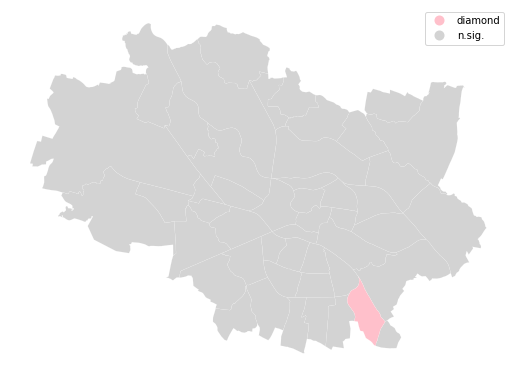

In [52]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [53]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 4, 3])

In [54]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

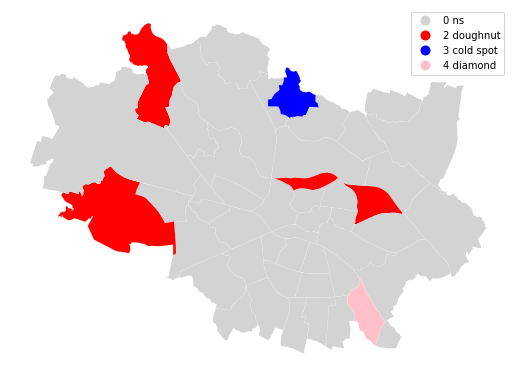

In [55]:

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()